In [54]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import numpy as np
import matplotlib.pyplot as plt

In [57]:
# working_df = pd.read_csv('DJIA_equities/GOOGL_2006-01-01_to_2018-01-01.csv', index_col = 'Date', parse_dates=True)
working_df = pd.read_csv('DJIA_equities/GOOGL_2006-01-01_to_2018-01-01.csv')
working_df['Date'] = pd.to_datetime(working_df['Date'], format= '%Y-%m-%d')
working_df.set_index('Date', inplace=True)

In [58]:
working_df.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL


In [59]:
working_df['delta_of_high_and_low'] = ((working_df.High - working_df.Low)/working_df.High)*100
working_df.head()
working_df.loc[working_df['delta_of_high_and_low'] >10]

,Open,High,Low,Close,Volume,Name,delta_of_high_and_low
Date,,,,,,,
2006-01-20,219.57,220.24,197.57,199.93,41182889,GOOGL,10.293316
2006-02-28,196.80,198.97,169.42,181.49,39446833,GOOGL,14.851485
2008-09-29,209.96,211.97,190.55,190.69,10764969,GOOGL,10.105204
2008-10-16,166.55,178.43,154.87,176.69,16289267,GOOGL,13.204058
2008-10-28,169.69,184.84,164.42,184.56,8106988,GOOGL,11.047392
2008-11-13,146.03,156.66,140.14,156.20,13239068,GOOGL,10.545130
2010-05-06,254.63,259.02,230.23,249.58,5000043,GOOGL,11.114972
2012-10-18,378.15,380.09,338.34,347.85,12442346,GOOGL,10.984241


In [60]:
working_dfopen = working_df.iloc[:,0:1]
working_dfhigh = working_df.iloc[:, 1:2]
working_dflow = working_df.iloc[:,2:3]
working_dfclose = working_df.iloc[:, 3:4]


<AxesSubplot:xlabel='Date'>

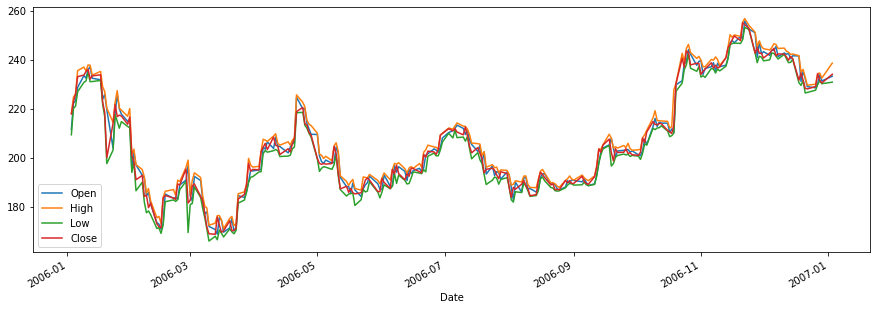

In [61]:
fig, ax = plt.subplots(figsize=(15,5))
working_dfopen['2006-01-03':'2007-01-03'].plot(ax=ax)
working_dfhigh['2006-01-03':'2007-01-03'].plot(ax=ax)
working_dflow['2006-01-03':'2007-01-03'].plot(ax=ax)
working_dfclose['2006-01-03':'2007-01-03'].plot(ax=ax)

In [62]:
year_groups= working_dfopen.groupby(pd.Grouper(freq='A'))

In [71]:
annual = pd.DataFrame()
for years, group in year_groups:
    annual[years.year] = group.values.ravel()
    print(len(group.values))
    print(len([years.year]))
# annual.plot(subplots=True, figsize=(25,10))
# len(group)

251
1
251
1


ValueError: Length of values (253) does not match length of index (251)

In [64]:
len(annual.index)

251

In [65]:
annual.tail()

,2006,2007
246,228.98,347.84
247,228.49,349.84
248,230.23,353.89
249,233.79,352.82
250,231.28,349.63


In [66]:
len(year_groups)

12